# Calibration plots for the YAML files shown in the YAML tutorial

This plots the calibration reslts from `run_tutorial_autocals` (which includes the final worked example as well as the YAML examples in the tutorial)

# Make project

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import atomica as at
import os
from os.path import isfile
import re
import sciris as sc

In [3]:
inputs = '../assets'
F = at.ProjectFramework(f'{inputs}/T7_framework.xlsx')
D = at.ProjectData.from_spreadsheet(f'{inputs}/T7_databook.xlsx', framework=F)
P = at.Project(framework=F,databook=D)
P.settings.update_time_vector(start=2000, end=2040, dt=1/52)

Elapsed time for running "default": 0.254s


# Pre-calibraton

Elapsed time for running "default": 3.33s


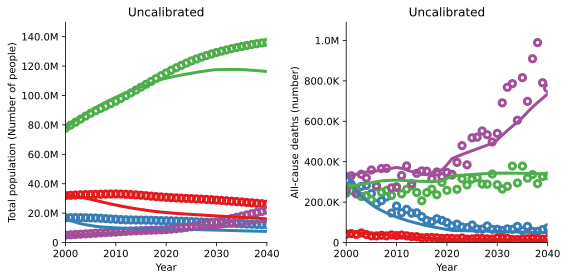

In [4]:
cal0 = P.make_parset()
res0 = P.run_sim(parset=cal0, result_name = 'Uncalibrated')
d = at.PlotData(res0, outputs=['alive','deaths'], project=P)
fig = at.plot_series(d,axis='pops', data=P.data, n_cols=2, legend_mode='none')[0]
fig.set_size_inches(8,4)
fig.tight_layout()

Elapsed time for running "default": 3.63s


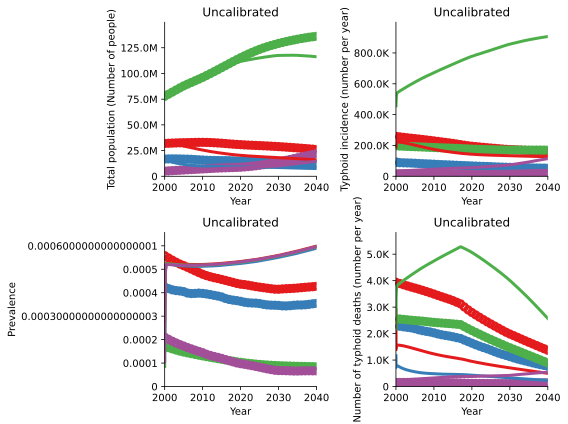

In [5]:
cal0 = P.make_parset()
res0 = P.run_sim(parset=cal0, result_name = 'Uncalibrated')
d = at.PlotData(res0, outputs=['alive', 'typ_incidence', 'typ_prev', 'typ_num_deaths'], project=P)
fig = at.plot_series(d,axis='pops', data=P.data, n_cols=2, legend_mode='none')[0]
fig.set_size_inches(8,6)
fig.tight_layout()

# Import calibrations

In [6]:
#calibration files to import
calpaths = ['cal_1', '', 'cal_3', 'cal_4', 'cal_5', 'cal_6', 'cal_7', 'cal_8', 'cal_9', 'cal_WE8']

In [7]:
resdict = sc.odict()
for i, file in enumerate(calpaths):
        print(i+1)
        print(file)
        print(f'res_{i+1}')
        if file == '':
            continue
        cal = P.make_parset()    
        cal = cal.load_calibration(f'{file}.xlsx')
        resdict[f'res_{i+1}'] = P.run_sim(parset=cal, result_name =  file)

1
cal_1
res_1


Elapsed time for running "default": 3.85s


2

res_2
3
cal_3
res_3


Elapsed time for running "default": 3.80s


4
cal_4
res_4


Elapsed time for running "default": 3.93s


5
cal_5
res_5


Elapsed time for running "default": 3.89s


6
cal_6
res_6


Elapsed time for running "default": 3.96s


7
cal_7
res_7


Elapsed time for running "default": 3.96s


8
cal_8
res_8


Elapsed time for running "default": 4.09s


9
cal_9
res_9


Elapsed time for running "default": 3.96s


WARNING {parameters.py:295} - Y-factors used for initialization have changed since the saved initialization was generated. These Y-factors will have no effect because a saved initialization is being used. Remove the initialization by setting `Parset.initialization=None` to return to using the Y-factors to adjust the initialization.


WARNING {parameters.py:295} - Y-factors used for initialization have changed since the saved initialization was generated. These Y-factors will have no effect because a saved initialization is being used. Remove the initialization by setting `Parset.initialization=None` to return to using the Y-factors to adjust the initialization.


WARNING {parameters.py:295} - Y-factors used for initialization have changed since the saved initialization was generated. These Y-factors will have no effect because a saved initialization is being used. Remove the initialization by setting `Parset.initialization=None` to return to using the Y-factors to adjust the initialization.


WARNING {parameters.py:295} - Y-factors used for initialization have changed since the saved initialization was generated. These Y-factors will have no effect because a saved initialization is being used. Remove the initialization by setting `Parset.initialization=None` to return to using the Y-factors to adjust the initialization.


10
cal_WE8
res_10


Elapsed time for running "default": 3.94s


# Plot calibrations

## 1 - Minimal yaml file (shown in tutorial)

In [8]:
# specific calibration
file = 'cal_1.xlsx'
cal1 = P.make_parset()    
cal1 = cal1.load_calibration(file)
res1 = P.run_sim(parset=cal1, result_name = 'Simple calibration')

Elapsed time for running "default": 3.84s


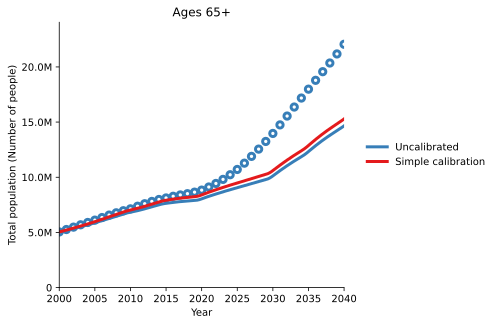

In [9]:
d = at.PlotData([res0, res1], outputs='alive', project=P, pops='65+')
at.plot_series(d, axis='results', data=P.data);

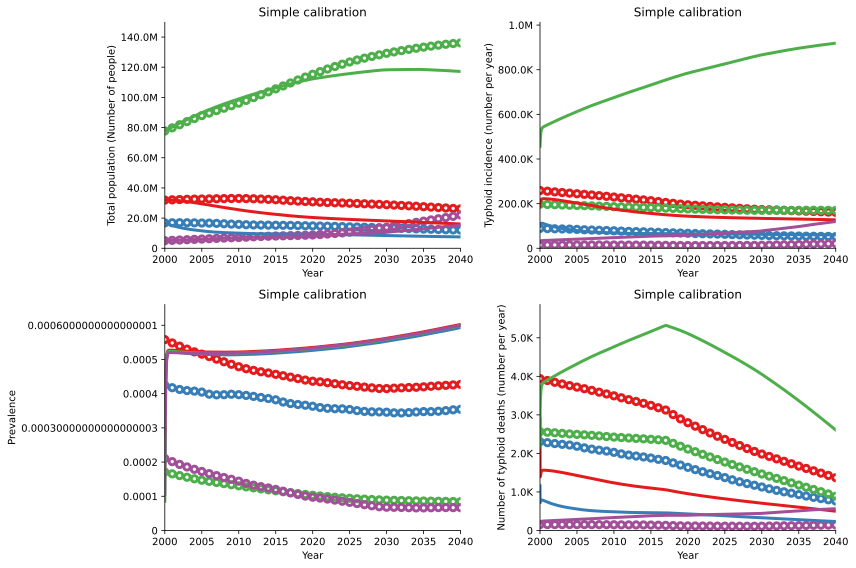

In [10]:
d = at.PlotData(res1, outputs=['alive','typ_incidence', 'typ_prev', 'typ_num_deaths'], project=P)
fig = at.plot_series(d,axis='pops', data=P.data, n_cols=2, legend_mode='none')[0]
fig.set_size_inches(12,8)
fig.tight_layout()

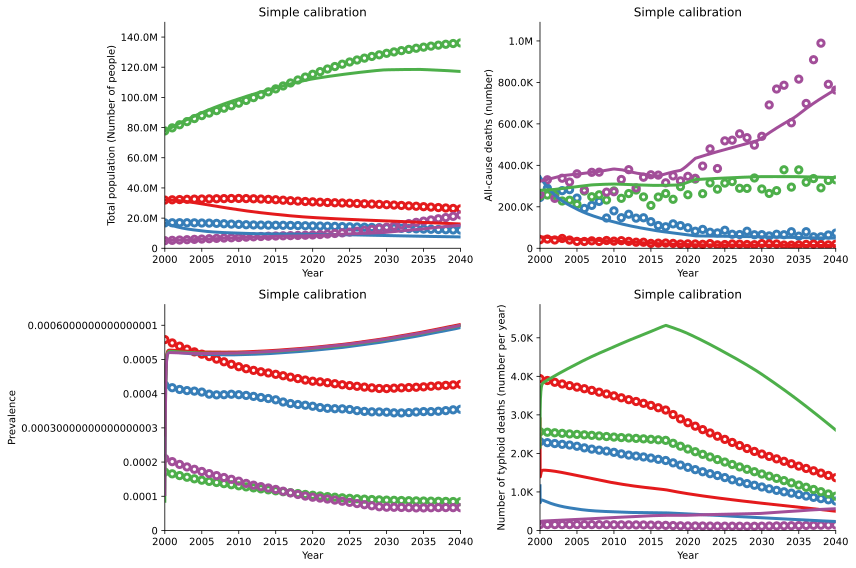

In [11]:
d = at.PlotData(res1, outputs=['alive', 'deaths', 'typ_prev', 'typ_num_deaths'], project=P)
fig = at.plot_series(d,axis='pops', data=P.data, n_cols=2, legend_mode='none')[0]
fig.set_size_inches(12,8)
fig.tight_layout()

## 3 - Repeats (not shown at the moment)

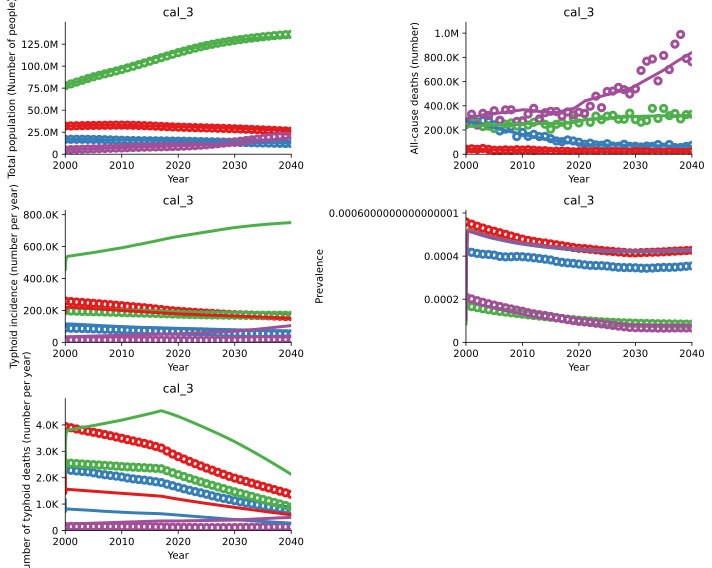

In [12]:
d = at.PlotData(resdict['res_3'], outputs=['alive','deaths', 'typ_incidence', 'typ_prev', 'typ_num_deaths'], project=P)
fig = at.plot_series(d,axis='pops', data=P.data, n_cols=2, legend_mode='none')[0]
fig.set_size_inches(10,8)
fig.tight_layout()

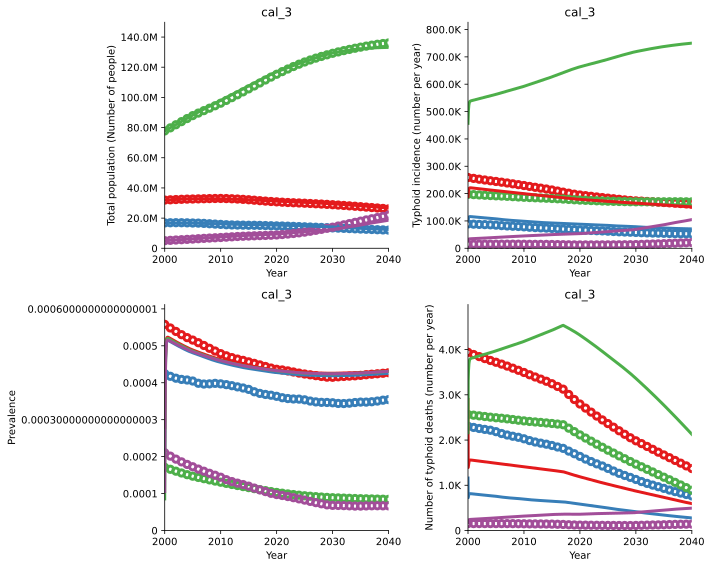

In [13]:
d = at.PlotData(resdict['res_3'], outputs=['alive','typ_incidence', 'typ_prev', 'typ_num_deaths', ], project=P)
fig = at.plot_series(d,axis='pops', data=P.data, n_cols=2, legend_mode='none')[0]
fig.set_size_inches(10,8)
fig.tight_layout()

## 4 - cal dict format  (not shown)

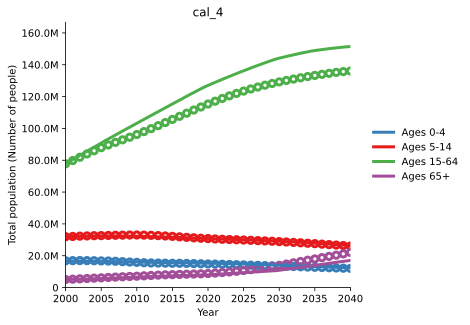

In [14]:
#plot total pop: cals vs no calibration
d = at.PlotData(resdict['res_4'], outputs='alive', project=P)
at.plot_series(d, axis='pops', data=P.data);

## 5 - calibrate specific pops (not shown)

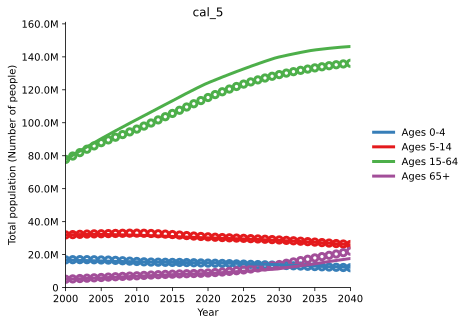

In [15]:
#plot total pop: cals vs no calibration
d = at.PlotData(resdict['res_5'], outputs='alive', project=P)
at.plot_series(d, axis='pops', data=P.data);

## 6 - cal with mult params (not shown)

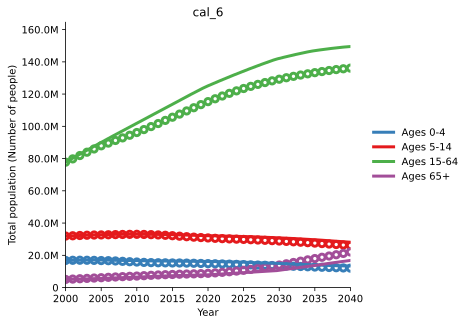

In [16]:
#plot total pop: cals vs no calibration
d = at.PlotData(resdict['res_6'], outputs='alive', project=P)
at.plot_series(d, axis='pops', data=P.data);

## 7 - init (showing a different example)

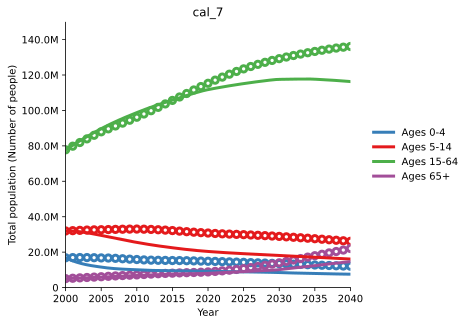

In [17]:
#plot total pop: cals vs no calibration
d = at.PlotData(resdict['res_7'], outputs='alive', project=P)
at.plot_series(d, axis='pops', data=P.data);

## 8 - clear init (showing a different example)

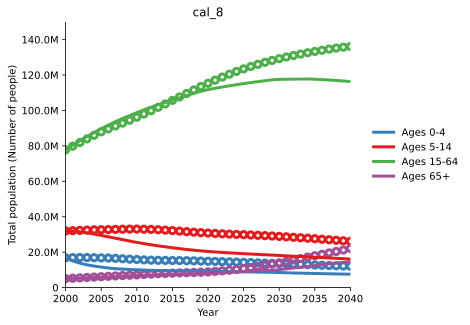

In [18]:
#plot total pop: cals vs no calibration
d = at.PlotData(resdict['res_8'], outputs='alive', project=P)
at.plot_series(d, axis='pops', data=P.data);

# cal 9 - outer settings (not shown)

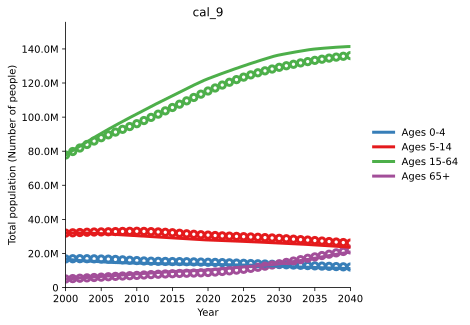

In [19]:
#plot total pop: cals vs no calibration
d = at.PlotData(resdict['res_9'], outputs='alive', project=P)
at.plot_series(d, axis='pops', data=P.data);

### add -cal with outer params (not shown)

In [20]:
# #plot total pop: cals vs no calibration
# d = at.PlotData(resdict['res_9'], outputs='alive', project=P)
# at.plot_series(d, axis='pops', data=P.data);

# WE_8: Worked example calibration (shown in tutorial)

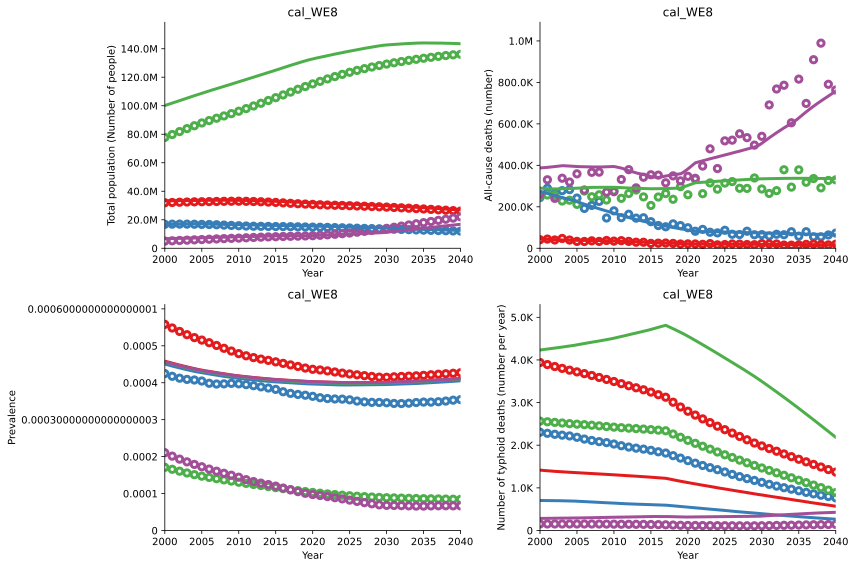

In [21]:
d = at.PlotData(resdict['res_10'], outputs=['alive', 'deaths', 'typ_prev', 'typ_num_deaths'], project=P)
fig = at.plot_series(d,axis='pops', data=P.data, n_cols=2, legend_mode='none')[0]
fig.set_size_inches(12,8)
fig.tight_layout()